In [ ]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wrangle_xml import wrangle_xml, preprocessing_xml, create_validate_xml_df

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = wrangle_xml()

In [5]:
df.head(2)

,creationDate,device,endDate,sourceName,sourceVersion,startDate,type,unit,value
0,2016-06-03 17:38:46 -0500,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52 -0500,Noah's iPhone,9.3.1,2016-06-03 16:40:09 -0500,HKQuantityTypeIdentifierStepCount,count,70.0
1,2016-06-03 17:38:46 -0500,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26 -0500,Noah's iPhone,9.3.1,2016-06-03 16:57:23 -0500,HKQuantityTypeIdentifierStepCount,count,68.0


In [6]:
df = preprocessing_xml(df)

In [7]:
df.head(2)

,startDate,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value
0,2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,70.0
1,2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,68.0


In [8]:
df_validate = create_validate_xml_df()

In [9]:
df_validate.head(2)

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value
0,2020-08-16,14656,6.7,0,14705.0,14705.0,14705.0
1,2020-08-15,10103,4.7,8,10103.0,10103.0,10103.0


In [10]:
# How many items are the same for each column?
for i in df_validate.columns[4:]:
    var = (df_validate.Steps == df_validate[i]).sum()
    print(f'{i} has {var} dates exactly the same')

start_value has 124 dates exactly the same
create_value has 93 dates exactly the same
end_value has 124 dates exactly the same


In [11]:
for i in df_validate.columns[4:]:
    var = abs(df_validate.Steps - df_validate[i]).sum()
    print(f'{i} has an absolute difference of {var} from pedometer data')

start_value has an absolute difference of 753943.0 from pedometer data
create_value has an absolute difference of 878594.0 from pedometer data
end_value has an absolute difference of 736764.0 from pedometer data


In [12]:
for i in df_validate.columns[4:]:
    var = (df_validate.Steps - df_validate[i]).sum()
    print(f'{i} has a total difference of {var} from pedometer data')

start_value has a total difference of -71843.0 from pedometer data
create_value has a total difference of -72180.0 from pedometer data
end_value has a total difference of -71826.0 from pedometer data


In [13]:
for i in df_validate.columns[4:]:
    var = (df_validate.Steps - df_validate[i]).max()
    print(f'{i} has an absolute difference of {var} from pedometer data')

start_value has an absolute difference of 21548.0 from pedometer data
create_value has an absolute difference of 21548.0 from pedometer data
end_value has an absolute difference of 21548.0 from pedometer data


In [14]:
df_validate['start_dif'] = df_validate.Steps - df_validate.start_value

In [15]:
df_validate.sort_values('start_dif')

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
531,2018-10-22,5363,2.3,3,73234.0,34313.0,1645.0,-67871.0
545,2018-10-08,2896,1.1,3,65756.0,42937.0,57.0,-62860.0
556,2018-09-27,5103,2.1,0,56741.0,5797.0,179.0,-51638.0
549,2018-10-04,5215,2.2,2,39324.0,4561.0,615.0,-34109.0
534,2018-10-19,5245,2.3,3,32512.0,18505.0,435.0,-27267.0
...,...,...,...,...,...,...,...,...
525,2018-10-28,17420,8.1,7,281.0,71870.0,71870.0,17139.0
547,2018-10-06,17611,7.3,3,0.0,0.0,0.0,17611.0
540,2018-10-13,17764,7.6,5,0.0,0.0,0.0,17764.0
533,2018-10-20,18040,7.9,5,0.0,0.0,0.0,18040.0


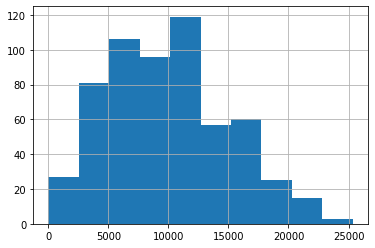

In [16]:
df_validate.Steps.hist()

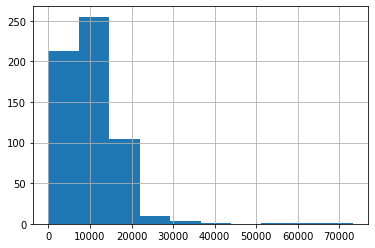

In [17]:
df_validate.start_value.hist()

In [31]:
df = df.set_index('startDate')

In [32]:
df.resample("D").value.sum().sort_values()

startDate
2018-10-24        0.000000
2018-09-29        0.000000
2018-09-30        0.000000
2018-10-01        0.000000
2018-10-06        0.000000
                  ...     
2018-10-19    32526.649745
2018-10-04    39340.326998
2018-09-27    56764.630502
2018-10-08    65784.717293
2018-10-22    73267.383074
Name: value, Length: 1538, dtype: float64

In [33]:
df.head()

,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value
startDate,,,,,,,,
2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,70.0
2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,68.0
2016-06-03 17:34:29,2016-06-03 18:39:21,"<<HKDevice: 0x2825a9270>, name:iPhone, manufac...",2016-06-03 17:35:45,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,55.0
2016-06-03 17:43:01,2016-06-03 18:39:21,"<<HKDevice: 0x2825aa030>, name:iPhone, manufac...",2016-06-03 17:48:03,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,42.0
2016-06-03 17:48:03,2016-06-03 18:39:21,"<<HKDevice: 0x2825a8cd0>, name:iPhone, manufac...",2016-06-03 17:49:54,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,43.0


In [34]:
df.unit.value_counts()

count    69116
mi       67908
Name: unit, dtype: int64

In [35]:
df_distance = df[df.unit == "mi"]

In [36]:
df_distance.resample("D").value.sum().sort_values()

startDate
2018-10-14     0.000000
2018-10-30     0.000000
2018-10-27     0.000000
2018-10-26     0.000000
2018-10-25     0.000000
                ...    
2018-11-10    15.053501
2018-10-04    16.326998
2018-09-27    23.630502
2018-10-08    28.717293
2018-10-22    33.383074
Name: value, Length: 1538, dtype: float64

In [37]:
df_validate.Distance.agg(['min', 'max'])

min     0.0
max    11.7
Name: Distance, dtype: float64

In [38]:
df_validate[df_validate.Distance < .5]

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
80,2020-05-28,839,0.4,0,839.0,839.0,839.0,0.0
174,2020-01-13,482,0.2,0,1741.0,1741.0,1741.0,-1259.0
231,2019-10-30,0,0.0,0,7430.0,7430.0,7430.0,-7430.0


In [39]:
df_validate[(df_validate.start_value >= 24639) |  (df_validate.end_value >= 24639) | (df_validate.create_value >= 24639)]

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
302,2019-06-08,25356,11.1,0,25324.0,25079.0,25324.0,32.0
508,2018-11-14,10660,5.2,6,10414.0,31002.0,10414.0,246.0
510,2018-11-12,13999,6.3,6,20808.0,31892.0,31892.0,-6809.0
512,2018-11-10,16555,8.0,8,30535.0,5407.0,926.0,-13980.0
519,2018-11-03,7190,3.1,5,20643.0,34547.0,34547.0,-13453.0
524,2018-10-29,10829,5.5,5,29373.0,55.0,55.0,-18544.0
525,2018-10-28,17420,8.1,7,281.0,71870.0,71870.0,17139.0
531,2018-10-22,5363,2.3,3,73234.0,34313.0,1645.0,-67871.0
532,2018-10-21,9355,4.5,2,591.0,0.0,32668.0,8764.0
534,2018-10-19,5245,2.3,3,32512.0,18505.0,435.0,-27267.0


In [40]:
df_validate.mean()

Steps               9956.735144
Distance               4.388964
Floors Ascended        1.298812
start_value        10078.709677
create_value       10079.281834
end_value          10078.680815
start_dif           -121.974533
dtype: float64

### Look at the hourly breakdown of steps to find out where data is bad

In [41]:
df_steps = df[df.type == 'HKQuantityTypeIdentifierStepCount']

In [42]:
hourly = pd.DataFrame(df_steps.resample("h").value.sum())

In [43]:
print("These are the outliers")
hourly.value.nlargest(11)

These are the outliers


startDate
2018-10-22 16:00:00    71589.0
2018-10-08 07:00:00    65756.0
2018-09-27 09:00:00    56614.0
2018-10-04 11:00:00    39099.0
2018-10-19 14:00:00    32309.0
2018-11-10 09:00:00    30485.0
2018-10-29 05:00:00    29373.0
2018-11-12 19:00:00    18525.0
2018-10-16 13:00:00    17002.0
2018-11-06 13:00:00    15795.0
2018-11-03 17:00:00    15757.0
Name: value, dtype: float64

In [44]:
df_miles = df[df.unit == 'mi']

In [45]:
miles = pd.DataFrame(df_miles.resample("h").value.sum())

In [46]:
miles.value.nlargest(11)

startDate
2018-10-22 16:00:00    32.675700
2018-10-08 07:00:00    28.717293
2018-09-27 09:00:00    23.572441
2018-10-04 11:00:00    16.237458
2018-11-10 09:00:00    15.029286
2018-10-19 14:00:00    14.555415
2018-10-29 05:00:00    14.286375
2018-11-12 19:00:00     8.112110
2018-10-16 13:00:00     7.980541
2018-11-06 13:00:00     6.858139
2018-11-03 17:00:00     6.674560
Name: value, dtype: float64

In [47]:
df.value.nlargest(11)

startDate
2018-10-22 16:07:27    71589.0
2018-10-08 07:46:00    65699.0
2018-09-27 09:10:19    56562.0
2018-10-04 11:43:34    38709.0
2018-10-19 14:23:17    32077.0
2018-11-10 09:22:40    29609.0
2018-10-29 05:58:07    29318.0
2018-11-12 19:07:48    18525.0
2018-10-16 13:58:54    16965.0
2018-11-06 13:48:08    15615.0
2018-11-03 17:35:35    15414.0
Name: value, dtype: float64

In [48]:
df.sort_values("index")

KeyError: 'index'

In [49]:
steps = df[df.type == 'HKQuantityTypeIdentifierStepCount'].reset_index().sort_values('startDate')

In [50]:
steps['next_record'] = steps.startDate.shift(-1) - steps.startDate

In [51]:
steps.next_record.nlargest(11)

39838   8 days 06:04:14
39887   6 days 03:26:09
39794   5 days 13:18:47
39893   5 days 02:51:01
39828   3 days 07:27:44
39967   2 days 06:51:15
39934   2 days 06:26:24
39863   2 days 03:48:13
39920   2 days 02:17:57
39840   1 days 21:41:42
39980   1 days 03:23:54
Name: next_record, dtype: timedelta64[ns]

In [52]:
distance = df[df.type == 'HKQuantityTypeIdentifierDistanceWalkingRunning'].reset_index().sort_values('startDate')

In [53]:
distance.head()

,startDate,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value
0,2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x282513d90>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierDistanceWalkingRunning,mi,0.035120
1,2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x282510fa0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierDistanceWalkingRunning,mi,0.030553
2,2016-06-03 17:34:29,2016-06-03 18:39:21,"<<HKDevice: 0x282513570>, name:iPhone, manufac...",2016-06-03 17:35:45,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierDistanceWalkingRunning,mi,0.021984
3,2016-06-03 17:43:01,2016-06-03 18:39:21,"<<HKDevice: 0x2825132a0>, name:iPhone, manufac...",2016-06-03 17:48:03,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierDistanceWalkingRunning,mi,0.014975
4,2016-06-03 17:48:03,2016-06-03 18:39:21,"<<HKDevice: 0x2825132f0>, name:iPhone, manufac...",2016-06-03 17:49:54,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierDistanceWalkingRunning,mi,0.016354


In [54]:
steps.head()

,startDate,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value,next_record
0,2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,70.0,00:17:14
1,2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,68.0,00:37:06
2,2016-06-03 17:34:29,2016-06-03 18:39:21,"<<HKDevice: 0x2825a9270>, name:iPhone, manufac...",2016-06-03 17:35:45,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,55.0,00:08:32
3,2016-06-03 17:43:01,2016-06-03 18:39:21,"<<HKDevice: 0x2825aa030>, name:iPhone, manufac...",2016-06-03 17:48:03,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,42.0,00:05:02
4,2016-06-03 17:48:03,2016-06-03 18:39:21,"<<HKDevice: 0x2825a8cd0>, name:iPhone, manufac...",2016-06-03 17:49:54,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,43.0,00:29:22


In [55]:
steps[(steps.startDate > "2018-09-27 00:00:00") & (steps.startDate < "2018-11-13 00:00:00")]

,startDate,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value,next_record
39790,2018-09-27 05:22:03,2018-09-27 08:08:01,"<<HKDevice: 0x28258ab70>, name:iPhone, manufac...",2018-09-27 05:22:15,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,17.0,0 days 00:42:28
39791,2018-09-27 06:04:31,2018-09-27 08:08:01,"<<HKDevice: 0x282589810>, name:iPhone, manufac...",2018-09-27 06:11:52,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,80.0,0 days 01:36:02
39792,2018-09-27 07:40:33,2018-09-27 08:08:01,"<<HKDevice: 0x28258b020>, name:iPhone, manufac...",2018-09-27 07:40:46,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,30.0,0 days 01:19:46
39793,2018-09-27 09:00:19,2018-09-27 09:12:22,"<<HKDevice: 0x28258ac10>, name:iPhone, manufac...",2018-09-27 09:10:19,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,52.0,0 days 00:10:00
39794,2018-09-27 09:10:19,2018-10-03 12:01:23,"<<HKDevice: 0x282588730>, name:iPhone, manufac...",2018-10-02 22:29:06,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,56562.0,5 days 13:18:47
...,...,...,...,...,...,...,...,...,...,...
39976,2018-11-12 18:22:01,2018-11-12 18:57:02,"<<HKDevice: 0x282507c50>, name:iPhone, manufac...",2018-11-12 18:31:23,Noah's iPhone,12.0.1,HKQuantityTypeIdentifierStepCount,count,135.0,0 days 00:10:28
39977,2018-11-12 18:32:29,2018-11-12 18:57:02,"<<HKDevice: 0x282507bb0>, name:iPhone, manufac...",2018-11-12 18:38:45,Noah's iPhone,12.0.1,HKQuantityTypeIdentifierStepCount,count,172.0,0 days 00:13:22
39978,2018-11-12 18:45:51,2018-11-12 18:57:02,"<<HKDevice: 0x2825079d0>, name:iPhone, manufac...",2018-11-12 18:52:30,Noah's iPhone,12.0.1,HKQuantityTypeIdentifierStepCount,count,62.0,0 days 00:12:01
39979,2018-11-12 18:57:52,2018-11-12 19:18:19,"<<HKDevice: 0x282506e40>, name:iPhone, manufac...",2018-11-12 19:07:48,Noah's iPhone,12.0.1,HKQuantityTypeIdentifierStepCount,count,157.0,0 days 00:09:56


In [56]:
steps.sort_values('value', ascending=False)

,startDate,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value,next_record
39887,2018-10-22 16:07:27,2018-10-28 19:30:28,"<<HKDevice: 0x282541360>, name:iPhone, manufac...",2018-10-28 19:23:29,Noah's iPhone,12.0.1,HKQuantityTypeIdentifierStepCount,count,71589.0,6 days 03:26:09
39838,2018-10-08 07:46:00,2018-10-16 13:30:53,"<<HKDevice: 0x2825625d0>, name:iPhone, manufac...",2018-10-16 13:02:24,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,65699.0,8 days 06:04:14
39794,2018-09-27 09:10:19,2018-10-03 12:01:23,"<<HKDevice: 0x282588730>, name:iPhone, manufac...",2018-10-02 22:29:06,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,56562.0,5 days 13:18:47
39828,2018-10-04 11:43:34,2018-10-08 06:32:22,"<<HKDevice: 0x28259c1e0>, name:iPhone, manufac...",2018-10-07 19:11:18,Noah's iPhone,12.0,HKQuantityTypeIdentifierStepCount,count,38709.0,3 days 07:27:44
39863,2018-10-19 14:23:17,2018-10-22 12:03:59,"<<HKDevice: 0x28256b840>, name:iPhone, manufac...",2018-10-21 17:42:20,Noah's iPhone,12.0.1,HKQuantityTypeIdentifierStepCount,count,32077.0,2 days 03:48:13
...,...,...,...,...,...,...,...,...,...,...
20978,2017-08-28 22:24:00,2017-08-28 23:28:00,"<<HKDevice: 0x2826ba120>, name:iPhone, manufac...",2017-08-28 22:29:56,Noah's iPhone,10.3.3,HKQuantityTypeIdentifierStepCount,count,1.0,0 days 06:47:16
20979,2017-08-29 05:11:16,2017-08-29 05:28:26,"<<HKDevice: 0x2826ba1c0>, name:iPhone, manufac...",2017-08-29 05:18:20,Noah's iPhone,10.3.3,HKQuantityTypeIdentifierStepCount,count,1.0,0 days 00:25:32
21026,2017-08-29 20:22:56,2017-08-29 21:26:08,"<<HKDevice: 0x28257d680>, name:iPhone, manufac...",2017-08-29 20:29:44,Noah's iPhone,10.3.3,HKQuantityTypeIdentifierStepCount,count,1.0,0 days 00:12:01
38197,2018-08-22 19:22:43,2018-08-22 20:37:59,"<<HKDevice: 0x2826c58b0>, name:iPhone, manufac...",2018-08-22 19:30:48,Noah's iPhone,11.4.1,HKQuantityTypeIdentifierStepCount,count,1.0,0 days 00:15:22


In [57]:
hourly['hour'] = hourly.index.hour

In [58]:
hourly

,value,hour
startDate,,
2016-06-03 16:00:00,138.0,16
2016-06-03 17:00:00,140.0,17
2016-06-03 18:00:00,160.0,18
2016-06-03 19:00:00,0.0,19
2016-06-03 20:00:00,13.0,20
...,...,...
2020-08-18 16:00:00,110.0,16
2020-08-18 17:00:00,38.0,17
2020-08-18 18:00:00,111.0,18


In [59]:
hourly['new_value'] = hourly.value.apply(lambda x: 1000 if x > 10000 else x)

In [60]:
hourly.value.mean()

372.23009785054074

In [61]:
hourly.new_value.mean()

361.8946954706855

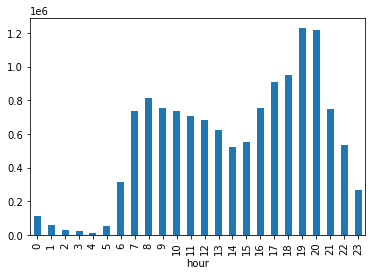

In [62]:
hourly.groupby('hour').new_value.sum().plot.bar()

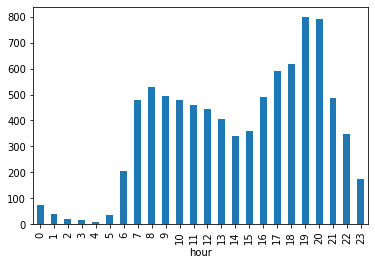

In [64]:
hourly.groupby('hour').new_value.mean().plot.bar()

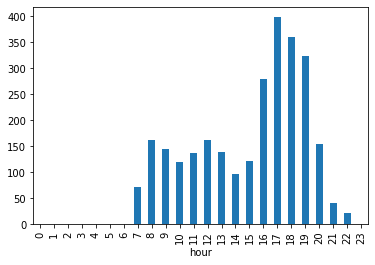

In [65]:
hourly.groupby('hour').new_value.median().plot.bar()